## Import what we need

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Check dataset directory

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import os

In [5]:
dataset_dir = "gdrive/MyDrive/Weathers/dataset_1/"

In [6]:
list_images = os.listdir(dataset_dir)
len(list_images)

1131

### Create empty lists and label dictionary

In [7]:
train_data = []
train_labels = []
test_data = []
test_labels = []
class_labels = {'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}

### Read images using OpenCV

In [8]:
import cv2

In [9]:
def found_label(img_name,class_labels):
  for cl in class_labels:
    if cl in img_name:
      return cl

In [10]:
for image_name in list_images:
  img = cv2.imread(os.path.join(dataset_dir, image_name))
  img = cv2.resize(img, (224, 224))
  rand_num = np.random.rand()
  if rand_num > 0.8:
    test_data.append(img)
    test_labels.append([class_labels[found_label(image_name,class_labels)]])
  else:
    train_data.append(img)
    train_labels.append([class_labels[found_label(image_name,class_labels)]])

In [11]:
len(train_data), len(train_labels)

(906, 906)

In [12]:
len(test_data), len(test_labels)

(225, 225)

### Convert Python lists to Numpy NDArray

In [13]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)
test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [14]:
train_data.shape, type(train_data), train_labels.shape, type(train_labels)

((906, 224, 224, 3), numpy.ndarray, (906, 1), numpy.ndarray)

In [15]:
test_data.shape, type(test_data), test_labels.shape, type(test_labels)

((225, 224, 224, 3), numpy.ndarray, (225, 1), numpy.ndarray)

### Convert labels to one-hot encoding

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
train_labels = to_categorical(train_labels)
train_labels.shape, train_labels.dtype

((906, 4), dtype('float32'))

In [18]:
test_labels = to_categorical(test_labels)
test_labels.shape, test_labels.dtype

((225, 4), dtype('float32'))

## Normalize Image Data => between 0 and 1 and float32 dtype

In [19]:
train_data.min(), train_data.max()

(0, 255)

In [20]:
train_data = train_data.astype(np.float32) / 255.0
test_data = test_data.astype(np.float32) / 255.0

In [21]:
train_data.min(), train_data.max(), train_data.shape, train_data.dtype

(0.0, 1.0, (906, 224, 224, 3), dtype('float32'))

In [22]:
test_data.min(), test_data.max(), test_data.shape, test_data.dtype

(0.0, 1.0, (225, 224, 224, 3), dtype('float32'))

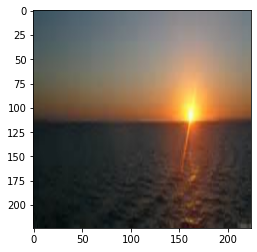

In [23]:
plt.imshow(cv2.cvtColor(train_data[2],cv2.COLOR_BGR2RGB))

In [24]:
train_labels[2]

array([0., 0., 0., 1.], dtype=float32)

# Shuffling

In [25]:
rs = np.random.get_state()
np.random.shuffle(train_data)
np.random.set_state(rs)
np.random.shuffle(train_labels)

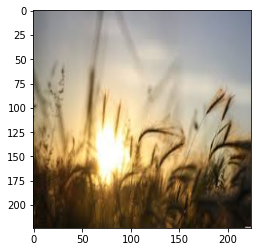

In [26]:
plt.imshow(cv2.cvtColor(train_data[2],cv2.COLOR_BGR2RGB))

In [27]:
train_labels[2]

array([0., 0., 0., 1.], dtype=float32)

In [28]:
rs = np.random.get_state()
np.random.shuffle(test_data)
np.random.set_state(rs)
np.random.shuffle(test_labels)

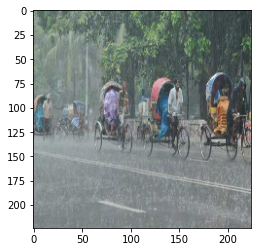

In [29]:
plt.imshow(cv2.cvtColor(test_data[2],cv2.COLOR_BGR2RGB))

In [30]:
test_labels[2]

array([0., 1., 0., 0.], dtype=float32)

## Now we can create our model

In [31]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, GlobalAveragePooling2D, Dense, Dropout , ReLU, BatchNormalization

In [32]:
i = Input(shape=(224, 224, 3))
x = Conv2D(filters=32, kernel_size=(5, 5), strides=1, padding='same')(i)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPool2D((2, 2))(x)

x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPool2D((2, 2))(x)

x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPool2D((2, 2))(x)

x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPool2D((2, 2))(x)

x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPool2D((2, 2))(x)


x = GlobalAveragePooling2D()(x)

x = Dense(units=32, activation='relu')(x)
# x = Dropout(0.5)(x)

predictions = Dense(units=4, activation='softmax')(x)

cnn_model = Model(i, predictions)
cnn_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
re_lu (ReLU)                 (None, 224, 224, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 64)      256   

## Compile and Train The Model with EarlyStopping

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=2)

In [59]:
from tensorflow.keras.optimizers import Adam, SGD
cnn_model.compile(optimizer=Adam(0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
cnn_model.fit(x=train_data, y=train_labels, batch_size=32, epochs=200, validation_data=(test_data, test_labels), callbacks=[early_stop])

Epoch 1/200
29/29 [==============================] - 7s 180ms/step - loss: 0.0618 - accuracy: 0.9793 - val_loss: 0.0559 - val_accuracy: 0.9822
Epoch 2/200
29/29 [==============================] - 5s 170ms/step - loss: 0.0547 - accuracy: 0.9845 - val_loss: 0.0560 - val_accuracy: 0.9822
Epoch 3/200
29/29 [==============================] - 5s 172ms/step - loss: 0.0545 - accuracy: 0.9827 - val_loss: 0.0590 - val_accuracy: 0.9822
Epoch 4/200
29/29 [==============================] - 5s 172ms/step - loss: 0.0621 - accuracy: 0.9797 - val_loss: 0.0585 - val_accuracy: 0.9778
Epoch 5/200
29/29 [==============================] - 5s 173ms/step - loss: 0.0508 - accuracy: 0.9872 - val_loss: 0.0579 - val_accuracy: 0.9778
Epoch 6/200
29/29 [==============================] - 5s 174ms/step - loss: 0.0604 - accuracy: 0.9894 - val_loss: 0.0650 - val_accuracy: 0.9778
Epoch 7/200
29/29 [==============================] - 5s 175ms/step - loss: 0.0602 - accuracy: 0.9801 - val_loss: 0.0630 - val_accuracy: 0.9822

#Plot Model History

In [61]:
model_history = pd.DataFrame(cnn_model.history.history)

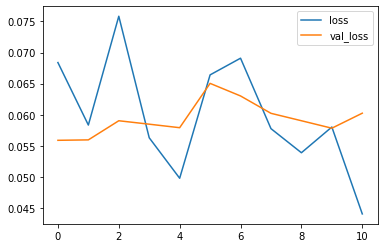

In [62]:
model_history[['loss', 'val_loss']].plot()

#Evaluate Our Model

In [64]:
cnn_model.evaluate(test_data, test_labels)

8/8 [==============================] - 0s 50ms/step - loss: 0.0559 - accuracy: 0.9822


[0.05588826164603233, 0.9822221994400024]

#classification_report and confusion_matrix

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

In [66]:
prediction_labels = cnn_model.predict(test_data)
prediction_sparse_labels = np.zeros((len(prediction_labels), ))
prediction_sparse_labels = np.argmax(prediction_labels, axis=1)
prediction_sparse_labels.shape, test_labels.shape

((225,), (225, 4))

In [67]:
prediction_sparse_labels[0], prediction_labels[0]

(3, array([4.0671844e-03, 3.1516480e-04, 4.4152215e-02, 9.5146537e-01],
       dtype=float32))

#Predict a single image

In [69]:
single_image_prediction = cnn_model.predict(test_data[10].reshape(1, 224, 224, 3))
single_image_prediction.argmax()

2

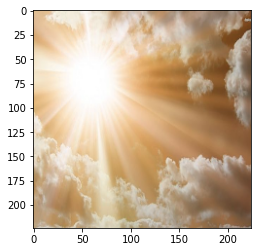

In [70]:
plt.imshow(test_data[10])

# Save My Model

In [77]:
tf.keras.models.save_model(
    cnn_model, filepath='gdrive/MyDrive/Assets/weather_model.h5', overwrite=True, include_optimizer=True, save_format=None,
    signatures=None, options=None, save_traces=True
)